# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#will print before data retrievel starts
print("Retrieving weather Data  ")
print("----------------------------")

url = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID={weather_api_key}"

#will hold the list of cities data
data = []

#make counters
record_count = 1 
set_count = 1

# loop through the cities in the data list 
#for a, city in enumerate(cities):
    
    #group cities in sets of 50 
    if(a % 50 == 0 and a >=50):
        
        # after 50 cities reset the group 
        set_count += 1
        record_count = 1 
        
    #creates endpoint for each city    
    city_link = f"{url}&q={city}"
    
    # logs record if  succesful and numbers it 
    print(f"Processing weather data for city #{record_count} in group #{set_count} | Retrieval for {city} Successful | Adding")
    record_count += 1
    
    #try:
        
        # runs the api and retrieves the data 
        city_weather = requests.get(city_link).json()
        
        #add a time delay to avoid messing up the api key
        time.sleep(2)
        
        # maxtemp humidity and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # append the city information into the dat list 
        data.append({"City": city,
                     "Latitude": city_lat,
                     "Longitude": city_lng,
                     "Max Temp": city_max_temp,
                     "Humidity": city_humidity,
                     "Cloudiness": city_clouds,
                     "Wind Speed": city_wind,
                     "Country": city_country,
                     "Date": city_date
                    })
    #except:
        #if there is an error when pulling from api call, skip the city 
        print(f"Processing weather data for city #{record_count} | Data corrupted or Missing | skipping...")
        pass
    
# show when data retrieval has ended 
print("---------------------------------------------")
print("Retrieval of weather data has been completed")
print("---------------------------------------------")

Retrieving weather Data  
----------------------------
Processing weather data for city #1 in group #1 | Retrieval for atambua Successful | Adding
Processing weather data for city #2 in group #1 | Retrieval for mataura Successful | Adding
Processing weather data for city #3 in group #1 | Retrieval for barrow Successful | Adding
Processing weather data for city #4 in group #1 | Retrieval for pevek Successful | Adding
Processing weather data for city #5 in group #1 | Retrieval for amderma Successful | Adding
Processing weather data for city #6 | Data corrupted or Missing | skipping...
Processing weather data for city #6 in group #1 | Retrieval for grand river south east Successful | Adding
Processing weather data for city #7 | Data corrupted or Missing | skipping...
Processing weather data for city #7 in group #1 | Retrieval for urumqi Successful | Adding
Processing weather data for city #8 in group #1 | Retrieval for cuervos Successful | Adding
Processing weather data for city #9 in gro

Processing weather data for city #34 in group #2 | Retrieval for yeppoon Successful | Adding
Processing weather data for city #35 in group #2 | Retrieval for manaus Successful | Adding
Processing weather data for city #36 in group #2 | Retrieval for fevralsk Successful | Adding
Processing weather data for city #37 | Data corrupted or Missing | skipping...
Processing weather data for city #37 in group #2 | Retrieval for san julian Successful | Adding
Processing weather data for city #38 in group #2 | Retrieval for saint anthony Successful | Adding
Processing weather data for city #39 in group #2 | Retrieval for pisco Successful | Adding
Processing weather data for city #40 in group #2 | Retrieval for castro Successful | Adding
Processing weather data for city #41 in group #2 | Retrieval for logan Successful | Adding
Processing weather data for city #42 in group #2 | Retrieval for quatre cocos Successful | Adding
Processing weather data for city #43 in group #2 | Retrieval for orikhove S

Processing weather data for city #16 in group #4 | Retrieval for quthing Successful | Adding
Processing weather data for city #17 in group #4 | Retrieval for bantry Successful | Adding
Processing weather data for city #18 in group #4 | Retrieval for emba Successful | Adding
Processing weather data for city #19 in group #4 | Retrieval for mormugao Successful | Adding
Processing weather data for city #20 in group #4 | Retrieval for tabou Successful | Adding
Processing weather data for city #21 in group #4 | Retrieval for bex Successful | Adding
Processing weather data for city #22 in group #4 | Retrieval for karratha Successful | Adding
Processing weather data for city #23 in group #4 | Retrieval for cabo san lucas Successful | Adding
Processing weather data for city #24 in group #4 | Retrieval for wanning Successful | Adding
Processing weather data for city #25 in group #4 | Retrieval for kushima Successful | Adding
Processing weather data for city #26 in group #4 | Retrieval for ulladu

Processing weather data for city #49 in group #5 | Retrieval for indian head Successful | Adding
Processing weather data for city #50 in group #5 | Retrieval for kawana waters Successful | Adding
Processing weather data for city #51 | Data corrupted or Missing | skipping...
Processing weather data for city #1 in group #6 | Retrieval for kamenskoye Successful | Adding
Processing weather data for city #2 | Data corrupted or Missing | skipping...
Processing weather data for city #2 in group #6 | Retrieval for yangambi Successful | Adding
Processing weather data for city #3 in group #6 | Retrieval for camabatela Successful | Adding
Processing weather data for city #4 in group #6 | Retrieval for yumen Successful | Adding
Processing weather data for city #5 in group #6 | Retrieval for yagodnoye Successful | Adding
Processing weather data for city #6 in group #6 | Retrieval for asau Successful | Adding
Processing weather data for city #7 in group #6 | Retrieval for samusu Successful | Adding


Processing weather data for city #30 in group #7 | Retrieval for port hardy Successful | Adding
Processing weather data for city #31 in group #7 | Retrieval for sola Successful | Adding
Processing weather data for city #32 in group #7 | Retrieval for tank Successful | Adding
Processing weather data for city #33 in group #7 | Retrieval for souillac Successful | Adding
Processing weather data for city #34 in group #7 | Retrieval for shimoda Successful | Adding
Processing weather data for city #35 in group #7 | Retrieval for liepaja Successful | Adding
Processing weather data for city #36 in group #7 | Retrieval for ciudad bolivar Successful | Adding
Processing weather data for city #37 in group #7 | Retrieval for anloga Successful | Adding
Processing weather data for city #38 in group #7 | Retrieval for vagur Successful | Adding
Processing weather data for city #39 in group #7 | Retrieval for alta floresta Successful | Adding
Processing weather data for city #40 in group #7 | Retrieval f

Processing weather data for city #11 in group #9 | Retrieval for gat Successful | Adding
Processing weather data for city #12 in group #9 | Retrieval for maloshuyka Successful | Adding
Processing weather data for city #13 | Data corrupted or Missing | skipping...
Processing weather data for city #13 in group #9 | Retrieval for teguise Successful | Adding
Processing weather data for city #14 in group #9 | Retrieval for lugo Successful | Adding
Processing weather data for city #15 in group #9 | Retrieval for victoria Successful | Adding
Processing weather data for city #16 in group #9 | Retrieval for broome Successful | Adding
Processing weather data for city #17 in group #9 | Retrieval for tutoia Successful | Adding
Processing weather data for city #18 in group #9 | Retrieval for deputatskiy Successful | Adding
Processing weather data for city #19 in group #9 | Retrieval for kysyl-syr Successful | Adding
Processing weather data for city #20 in group #9 | Retrieval for qingquan Successfu

Processing weather data for city #44 | Data corrupted or Missing | skipping...
Processing weather data for city #44 in group #10 | Retrieval for cap malheureux Successful | Adding
Processing weather data for city #45 in group #10 | Retrieval for bay roberts Successful | Adding
Processing weather data for city #46 in group #10 | Retrieval for karasjok Successful | Adding
Processing weather data for city #47 in group #10 | Retrieval for utiroa Successful | Adding
Processing weather data for city #48 | Data corrupted or Missing | skipping...
Processing weather data for city #48 in group #10 | Retrieval for noyabrsk Successful | Adding
Processing weather data for city #49 in group #10 | Retrieval for woodbridge Successful | Adding
Processing weather data for city #50 in group #10 | Retrieval for chagda Successful | Adding
Processing weather data for city #51 | Data corrupted or Missing | skipping...
Processing weather data for city #1 in group #11 | Retrieval for correntina Successful | Ad

Processing weather data for city #24 in group #12 | Retrieval for senekal Successful | Adding
Processing weather data for city #25 in group #12 | Retrieval for gimli Successful | Adding
Processing weather data for city #26 in group #12 | Retrieval for aloleng Successful | Adding
Processing weather data for city #27 in group #12 | Retrieval for antofagasta Successful | Adding
Processing weather data for city #28 in group #12 | Retrieval for lucapa Successful | Adding
Processing weather data for city #29 in group #12 | Retrieval for samarai Successful | Adding
Processing weather data for city #30 in group #12 | Retrieval for storforshei Successful | Adding
Processing weather data for city #31 in group #12 | Retrieval for sile Successful | Adding
Processing weather data for city #32 in group #12 | Retrieval for beringovskiy Successful | Adding
Processing weather data for city #33 in group #12 | Retrieval for nuuk Successful | Adding
Processing weather data for city #34 in group #12 | Retr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# converting data into Dataframe
city_weather = pd.DataFrame(data)
city_weather.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atambua,-9.1061,124.8925,78.24,60,48,2.48,ID,1661729705
1,mataura,-46.1927,168.8643,46.47,59,3,1.90,NZ,1661729707
2,barrow,71.2906,-156.7887,41.02,87,75,9.22,US,1661729710
3,pevek,69.7008,170.3133,41.95,74,7,4.00,RU,1661729712
4,urumqi,43.8010,87.6005,63.55,39,0,6.71,CN,1661729642


In [6]:
city_weather.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,20.563057,23.958840,67.319155,72.433453,52.787770,7.805971,1.661730e+09
std,33.727355,89.294922,13.846015,19.690330,38.540466,5.101142,4.132077e+02
min,-54.800000,-179.166700,29.260000,7.000000,0.000000,0.000000,1.661730e+09
25%,-7.885750,-52.020900,56.212500,62.000000,14.000000,3.960000,1.661730e+09
50%,25.284300,26.645500,69.390000,77.000000,53.500000,6.910000,1.661730e+09
75%,49.874775,100.378650,77.955000,87.000000,94.000000,10.722500,1.661731e+09
max,78.218600,179.316700,106.750000,100.000000,100.000000,27.830000,1.661731e+09


In [10]:
city_weather.to_csv("city_weather.csv")
city_weather = pd.read_csv("city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
max_humidity = city_weather[(city_weather["Humidity"] > 100)].index
max_humidity

Int64Index([], dtype='int64')

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_weather = city_weather.drop(max_humidity, inplace= False)
clean_weather.head()

,Unnamed: 0.1,Unnamed: 0,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,0,atambua,-9.1061,124.8925,78.24,60,48,2.48,ID,1661729705
1,1,1,mataura,-46.1927,168.8643,46.47,59,3,1.90,NZ,1661729707
2,2,2,barrow,71.2906,-156.7887,41.02,87,75,9.22,US,1661729710
3,3,3,pevek,69.7008,170.3133,41.95,74,7,4.00,RU,1661729712
4,4,4,urumqi,43.8010,87.6005,63.55,39,0,6.71,CN,1661729642


In [21]:
# data form DF i want to keep
lats = clean_weather["Latitude"]
max_temps = clean_weather["Max Temp"]
humidity = clean_weather["Humidity"]
cloudiness = clean_weather["Cloudiness"]
wind_speed = clean_weather["Wind Speed"]

#export that data into csv file 
clean_weather.to_csv(output_data_file, index_label = "City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

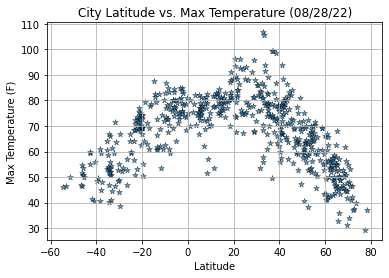

In [22]:
plt.scatter(lats, max_temps, edgecolor = "black", linewidth = 0.5, marker = "*",
            alpha = .7, label = "cities")

#add labeling and different customizations
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot chart 
plt.savefig("output_data/Fig1.png")

#dsiplay the plot chart 
plt.show()

## Latitude vs. Humidity Plot

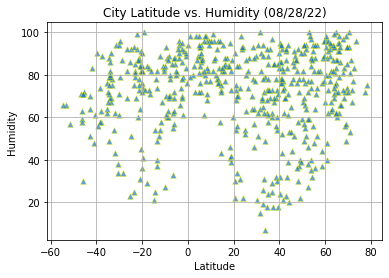

In [24]:
plt.scatter(lats, humidity, edgecolor = "yellow", linewidth = 0.5, marker = "^",
            alpha = .7, label = "cities")

#add labeling and different customizations
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot chart 
plt.savefig("output_data/Fig2.png")

#dsiplay the plot chart 
plt.show()

## Latitude vs. Cloudiness Plot

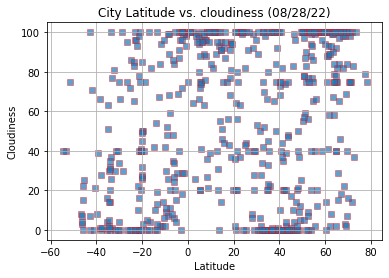

In [27]:
plt.scatter(lats, cloudiness, edgecolor = "red", linewidth = 0.5, marker = "s",
            alpha = .7, label = "cities")

#add labeling and different customizations
plt.title("City Latitude vs. cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot chart 
plt.savefig("output_data/Fig3.png")

#dsiplay the plot chart 
plt.show()

## Latitude vs. Wind Speed Plot

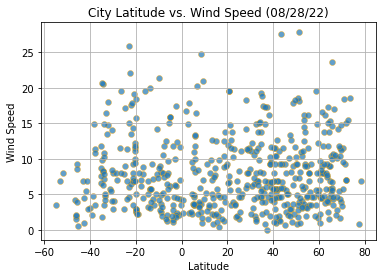

In [28]:
plt.scatter(lats, wind_speed, edgecolor = "orange", linewidth = 0.5, marker = "o",
            alpha = .7, label = "cities")

#add labeling and different customizations
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the plot chart 
plt.savefig("output_data/Fig4.png")

#dsiplay the plot chart 
plt.show()

## Linear Regression

In [36]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    #runs a regression on the hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y - " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    #plot the regression
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = "orange")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [37]:
#create a north and south hemisphere 
northern_hemi = city_weather.loc[(city_weather["Latitude"] >= 0)]
southern_hemi = city_weather.loc[(city_weather["Latitude"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4978905628625174


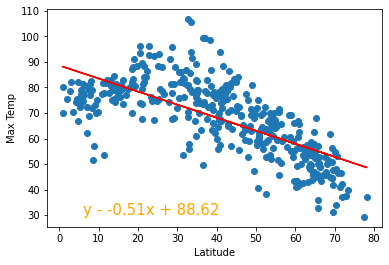

In [38]:
# regressions for northern hemisphere vs temps
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6145925118992852


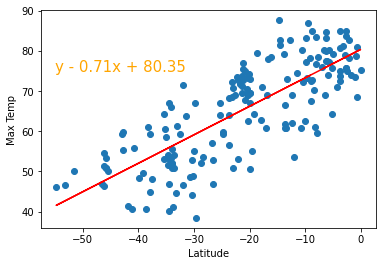

In [41]:
# regressions for southern hemisphere vs temps
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-55,75))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.001113948134176288


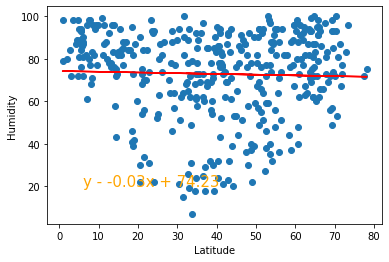

In [65]:
#regression for northern hemishphere humidity vs latitude
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (6,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03375967623548129


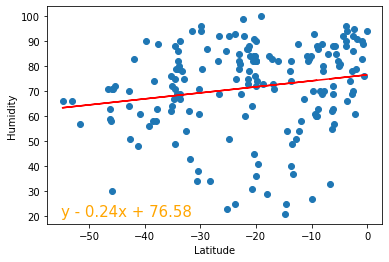

In [64]:
#regression for southern hemishphere humidity vs latitude
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-55,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 5.612646115553857e-07


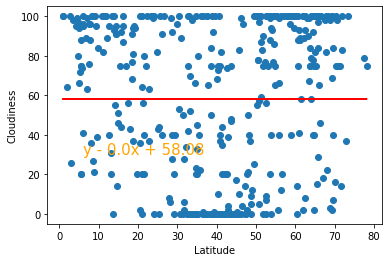

In [59]:
#regression for northern hemishphere cloudiness vs latitude
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (6,30))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08576951430650574


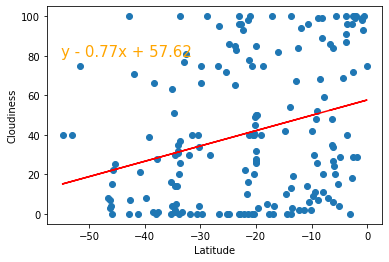

In [62]:
#regression for southern hemishphere cloudiness vs latitude
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-55,80))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.006531010609965525


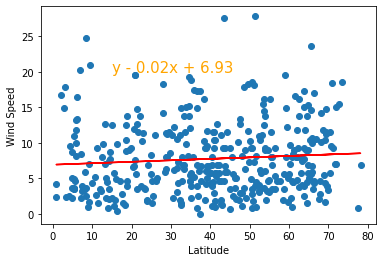

In [68]:
#regression for northern hemishphere wind speed vs latitude
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (15,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0006647338329776461


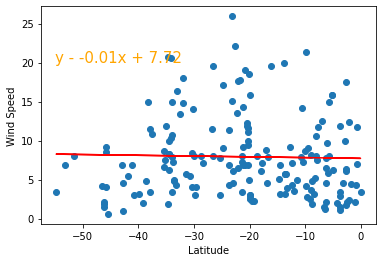

In [70]:
#regression for southern hemishphere wind speed vs latitude
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-55,20))